# Python 测试

In [25]:
%pip install --upgrade pip -q
%pip install matplotlib seaborn pandas -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.xkcd()
sns.set_context('poster')

## 数据

In [27]:
import pandas as pd
# read the run_main_results.csv file
df = pd.read_csv('../run_main_results.csv')
# rename columns
df.columns = [ 'Version', 'Runtime']
# split the version column only keep the version number
df['Version'] = df['Version'].str.split(' ').str[-1]

df.head()

,Version,Runtime
0,3.5,72.9614
1,3.6,71.2707
2,3.7,74.5476
3,3.8,79.0020
4,3.9,70.4012


In [28]:
# versions = ['3.5', '3.6', '3.7', '3.8', '3.9', '3.10', '3.11']
# times = [50.1815,  51.0515, 50.4755, 51.6387, 47.9749, 46.3438, 37.0328]
# df = pd.DataFrame({'Version': versions, 'Runtime': times})

c_data = [11.1265, 11.1364]


In [29]:
display(df)

,Version,Runtime
0,3.5,72.9614
1,3.6,71.2707
2,3.7,74.5476
3,3.8,79.0020
4,3.9,70.4012
5,3.10,65.0887
6,3.11,53.3336
7,3.12,49.7507


## 只有 Python 的数据

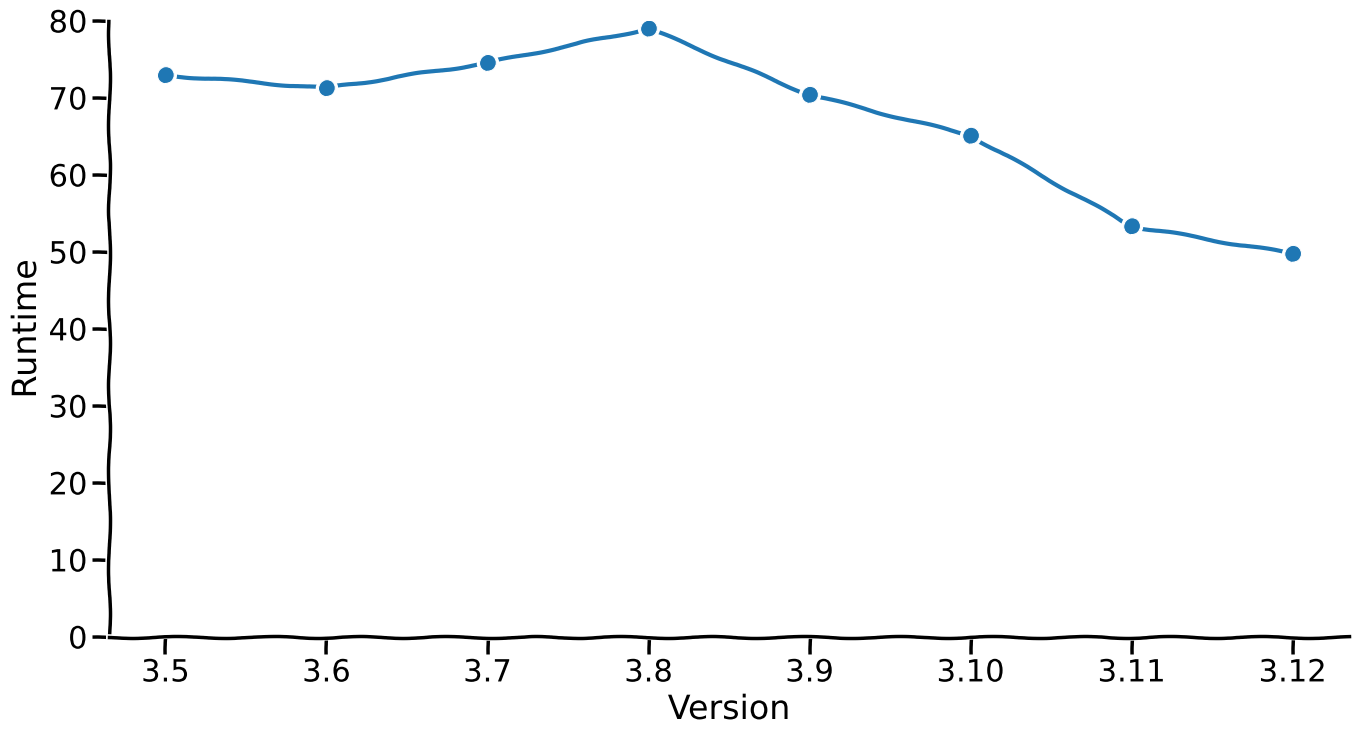

In [35]:
import matplotlib 

FIGSIZE = (16, 8)
plt.rcParams.update({'font.family': "DejaVu Sans"})
fig, ax = plt.subplots(figsize=FIGSIZE)
sns.lineplot(data=df, x='Version', y='Runtime', marker="o", ax=ax)
sns.despine()
_ = ax.set_ylim([0,80])

fig.savefig('../assets/1_only_python.png', bbox_inches='tight')

## 包含 C++ 的版本

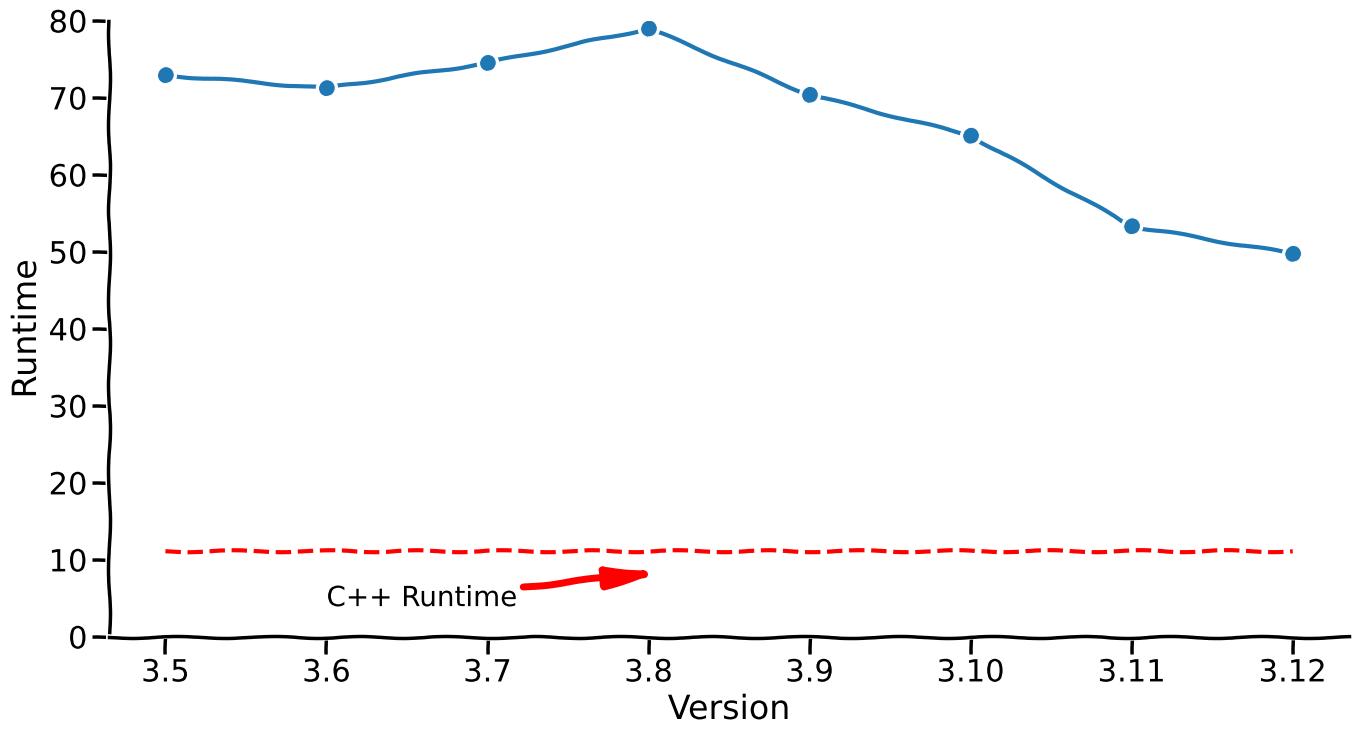

In [36]:
fig, ax = plt.subplots(figsize=FIGSIZE)
sns.lineplot(data=df, x='Version', y='Runtime', marker="o", ax=ax)
sns.despine()
_ = ax.set_ylim([0, 80])
_ = ax.plot(['3.5', '3.12'], c_data, 'r--')

ax.annotate(
    "C++ Runtime", 
    xy=(3.1, 8.5), 
    xytext=(1, 4), 
    arrowprops={
        "arrowstyle":"-|>, head_length=1.5, head_width=0.3", 
        "color":"red",
        "lw":5,
    },
    fontsize=20,
)

fig.savefig('../assets/2_include_cpp.png', bbox_inches='tight')

## 预测

In [37]:
df

,Version,Runtime,major_version,minor_version
0,3.5,72.9614,3,5
1,3.6,71.2707,3,6
2,3.7,74.5476,3,7
3,3.8,79.0020,3,8
4,3.9,70.4012,3,9
5,3.10,65.0887,3,10
6,3.11,53.3336,3,11
7,3.12,49.7507,3,12


In [38]:
df['major_version'] = df['Version'].str.split('.').str[0].astype(int)
df['minor_version'] = df['Version'].str.split('.').str[1].astype(int)
df

,Version,Runtime,major_version,minor_version
0,3.5,72.9614,3,5
1,3.6,71.2707,3,6
2,3.7,74.5476,3,7
3,3.8,79.0020,3,8
4,3.9,70.4012,3,9
5,3.10,65.0887,3,10
6,3.11,53.3336,3,11
7,3.12,49.7507,3,12


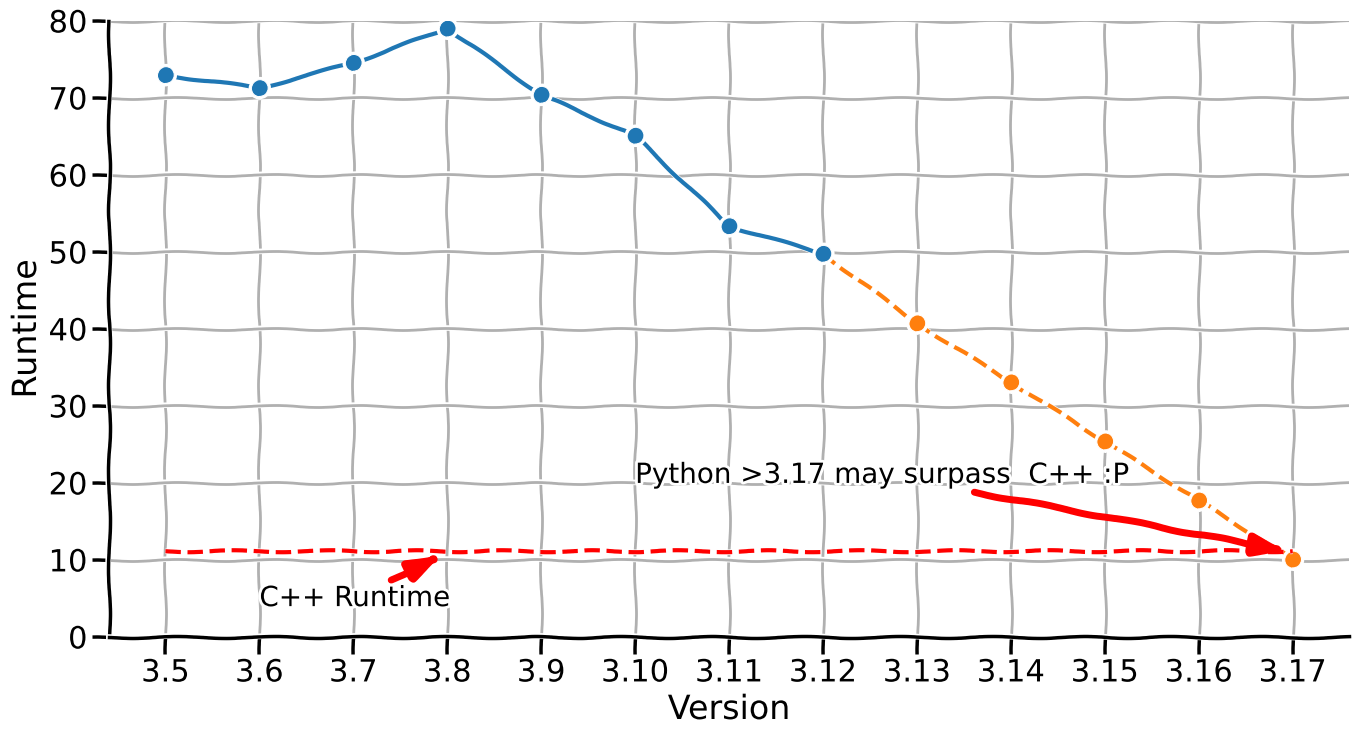

In [39]:
cpp_time = c_data[1]

prev_n = 3
x = df.loc[len(df)-prev_n:, 'minor_version']
y = df.loc[len(df)-prev_n:, 'Runtime']

parameters = np.polyfit(x, y, 1)

def polyfit(parameters: list, x: int) -> float:
    return x * parameters[0] + parameters[1]

last_version = df.minor_version.iat[-1]
ith_version = last_version + 1
new_versions, new_times = [], []
while True:
    new_versions.append(ith_version)
    new_times.append(polyfit(parameters, ith_version))
    ith_version += 1
    if new_times[-1] < cpp_time:
        break

new_labels = [str(df.major_version.iat[0]) + '.' + str(x) for x in new_versions]

new_version_df = pd.DataFrame({
    'Version': new_labels,
    'Runtime': new_times,
})

colors = sns.color_palette("tab10")
fig, ax = plt.subplots(figsize=FIGSIZE)
sns.lineplot(data=df, x='Version', y='Runtime', marker="o", ax=ax, color=colors[0], zorder=2)
sns.despine()
ax.set_ylim([0,80])
# Turn on the grid
ax.grid(True)
 
sns.lineplot(data=new_version_df, x='Version', y='Runtime', marker="o", ax=ax, color=colors[1], linestyle='--', zorder=2)
_ = ax.plot([df['Version'].iat[-1], new_labels[0]], [df['Runtime'].iat[-1], new_times[0]], '--', color=colors[1], zorder=1)

# C++ version
_ = ax.plot(['3.5', new_labels[-1]], c_data, 'r--')

_ = ax.annotate(
    "C++ Runtime", 
    xy=(3., 11), 
    xytext=(1, 4), 
    arrowprops={
        "arrowstyle":"-|>, head_length=1, head_width=0.3", 
        "color":"red",
        "lw":5,
    },
    fontsize=20,
)

_ = ax.annotate(
    "Python >3.17 may surpass  C++ :P", 
    xy=(12, 11), 
    xytext=(5, 20), 
    arrowprops={
        "arrowstyle":"-|>, head_length=1, head_width=0.3", 
        "color":"red",
        "lw":5,
    },
    fontsize=20,
)
fig.savefig('../assets/3_extrapolated.png', bbox_inches='tight')